In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\ML Project - Decision Tree Airline Customer Satisfaction U16955468980.txt")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,...,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,...,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       10000 non-null  int64  
 1   Unnamed: 0                         10000 non-null  int64  
 2   id                                 10000 non-null  int64  
 3   Gender                             10000 non-null  object 
 4   Customer Type                      10000 non-null  object 
 5   Age                                10000 non-null  int64  
 6   Type of Travel                     10000 non-null  object 
 7   Class                              10000 non-null  object 
 8   Flight Distance                    10000 non-null  int64  
 9   Inflight wifi service              10000 non-null  int64  
 10  Departure/Arrival time convenient  10000 non-null  int64  
 11  Ease of Online booking             10000 non-null  int6

In [7]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [9]:
for col in df.columns:
    df[col].replace(" ","_",inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_40784\1363960147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(" ","_",inplace=True)


In [10]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [11]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [12]:
df['satisfaction']=df['satisfaction'].replace(['neutral or dissatisfied','satisfied'],[0,1])

C:\Users\HP\AppData\Local\Temp\ipykernel_40784\3376939485.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['satisfaction']=df['satisfaction'].replace(['neutral or dissatisfied','satisfied'],[0,1])


In [13]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.0,1
9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.0,1
9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,...,4,4,4,4,3,4,2,0,0.0,1
9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.0,1


In [14]:
df['satisfaction'].value_counts()

satisfaction
0    5689
1    4311
Name: count, dtype: int64

<Axes: xlabel='satisfaction'>

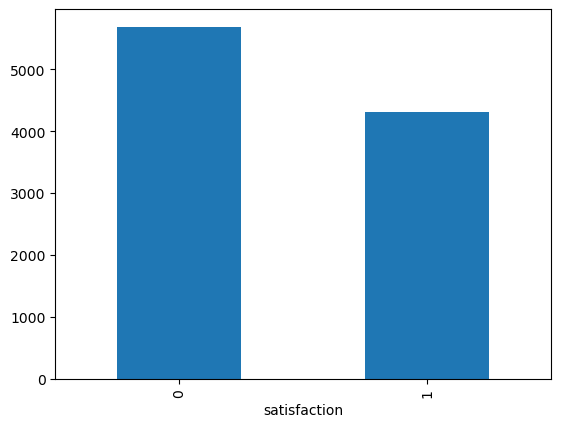

In [15]:
df['satisfaction'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

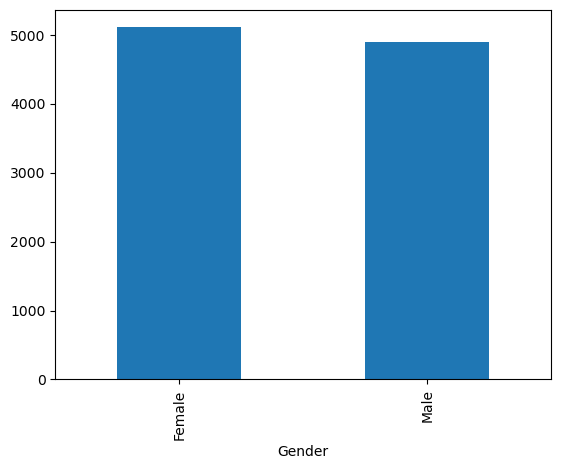

In [16]:
df['Gender'].value_counts().plot(kind='bar')

In [17]:
df[['satisfaction','Gender']].groupby(['Gender']).mean()

,satisfaction
Gender,
Female,0.424432
Male,0.438062


In [18]:
df[['satisfaction','Age']].groupby(['Age']).mean()

,satisfaction
Age,
7,0.071429
8,0.081967
9,0.194030
10,0.137255
11,0.115942
...,...
76,0.000000
77,0.222222
79,0.666667


In [19]:
df[['satisfaction','Food and drink']].groupby(['Food and drink']).mean()

,satisfaction
Food and drink,
0,0.625000
1,0.198142
2,0.362305
3,0.404990
4,0.515050
5,0.566176


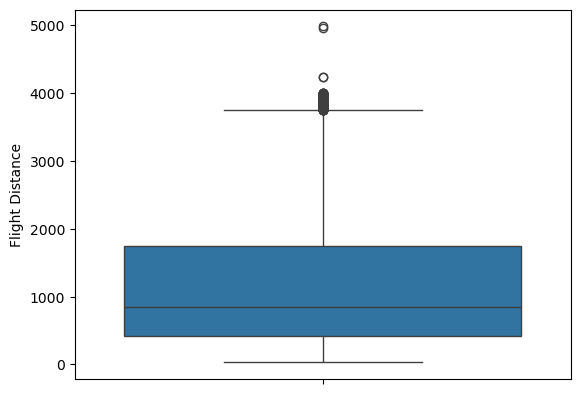

In [20]:
sns.boxplot(df['Flight Distance'])
plt.show()

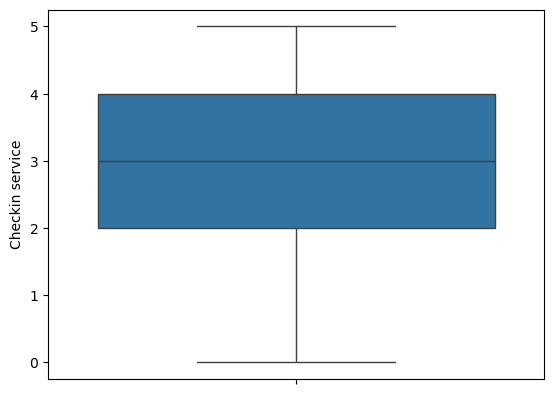

In [21]:
sns.boxplot(df['Checkin service'])
plt.show()

In [22]:
df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26
satisfaction                          0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum().sum()

0

In [25]:
df['Flight Distance'].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

In [26]:
#no need of [id] column to make prediction so drop it
df.drop('id',axis=1,inplace=True)

#### now doing label encoding on object column to convert them to int

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
# for loop to perform label encoding
for col in df.columns:
    if df[col].dtype=='object':
         df[col]=le.fit_transform(df[col])
         print(le.classes_)

['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Business' 'Eco' 'Eco Plus']


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             9974 non-null   int32  
 1   Customer Type                      9974 non-null   int32  
 2   Age                                9974 non-null   int64  
 3   Type of Travel                     9974 non-null   int32  
 4   Class                              9974 non-null   int32  
 5   Flight Distance                    9974 non-null   int64  
 6   Inflight wifi service              9974 non-null   int64  
 7   Departure/Arrival time convenient  9974 non-null   int64  
 8   Ease of Online booking             9974 non-null   int64  
 9   Gate location                      9974 non-null   int64  
 10  Food and drink                     9974 non-null   int64  
 11  Online boarding                    9974 non-null   int64  
 1

#### now spliting data into x & y

In [33]:
x=df.drop('satisfaction',axis=1)
y=df['satisfaction']

In [34]:
x

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,50,0,0,3599,3,3,3,3,...,4,5,5,5,5,5,5,4,12,24.0
9996,1,0,38,0,0,3873,5,5,5,5,...,5,4,4,4,4,3,4,5,0,0.0
9997,0,0,39,0,0,319,4,4,4,4,...,4,4,4,4,4,3,4,2,0,0.0
9998,1,0,52,0,0,1363,5,5,5,5,...,5,4,4,3,4,5,4,5,1,11.0


In [35]:
#since [flight distance] column value is higher in magnitude it will affect the model so we will
#perform scaling of x 

#### scaling the data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scal_x=StandardScaler()

In [39]:
x_scal=scal_x.fit_transform(x)

In [40]:
x_scal=pd.DataFrame(x_scal,columns=x.columns)

In [41]:
x_scal

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.022101,-0.468152,-1.739013,1.507418,2.269235,-0.737519,0.201740,0.629103,0.175328,-1.534155,...,1.197922,1.241813,0.492014,-0.264779,0.319439,0.562836,1.161719,1.311516,0.267269,0.071064
1,1.022101,2.136058,-0.945477,-0.663386,-0.947100,-0.962124,0.201740,-0.680029,0.175328,0.023662,...,-1.818316,-1.741829,-1.836318,1.260872,-0.520774,-1.801501,0.315212,-1.715981,-0.360223,-0.238149
2,-0.978377,-0.468152,-0.879349,-0.663386,-0.947100,-0.056715,-0.551311,-0.680029,-0.537562,-0.755246,...,1.197922,1.241813,0.492014,-0.264779,0.319439,0.562836,0.315212,1.311516,-0.386368,-0.392755
3,-0.978377,-0.468152,-0.945477,-0.663386,-0.947100,-0.635698,-0.551311,1.283668,1.601106,1.581480,...,-1.064257,-0.995918,-1.060207,1.260872,-0.520774,-1.801501,0.315212,-0.959107,-0.098768,-0.160845
4,1.022101,-0.468152,1.435132,-0.663386,-0.947100,-0.983087,0.201740,-0.025463,0.175328,0.023662,...,1.197922,-0.250008,-0.284097,0.498047,0.319439,-0.225277,-0.531294,-0.202233,-0.386368,-0.392755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9969,1.022101,-0.468152,0.707724,-0.663386,-0.947100,2.395974,0.201740,-0.025463,0.175328,0.023662,...,0.443862,1.241813,1.268125,1.260872,1.159652,1.350948,1.161719,0.554641,-0.072622,0.225670
9970,1.022101,-0.468152,-0.085813,-0.663386,-0.947100,2.669493,1.707841,1.283668,1.601106,1.581480,...,1.197922,0.495903,0.492014,0.498047,0.319439,-0.225277,0.315212,1.311516,-0.386368,-0.392755
9971,-0.978377,-0.468152,-0.019685,-0.663386,-0.947100,-0.878271,0.954790,0.629103,0.888217,0.802571,...,0.443862,0.495903,0.492014,0.498047,0.319439,-0.225277,0.315212,-0.959107,-0.386368,-0.392755
9972,1.022101,-0.468152,0.839980,-0.663386,-0.947100,0.163897,1.707841,1.283668,1.601106,1.581480,...,1.197922,0.495903,0.492014,-0.264779,0.319439,1.350948,0.315212,1.311516,-0.360223,-0.109310


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,train_size=0.7,random_state=2)

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model=DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_split=3)

In [46]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_split=3)

In [47]:
model.score(x_train,y_train)

0.9106145251396648

In [48]:
model.score(x_test,y_test)

0.8940862011359839

##### hyper-parameter tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
dic={
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12],    
    'max_features': ["sqrt"],
    'min_samples_leaf':[1,2],
    'min_samples_split':[1,2,3],
    'criterion':['gini','entropy']
}

In [53]:
random=RandomizedSearchCV(model,param_distributions=dic,n_iter=25,cv=4,verbose=0)

In [55]:
random

RandomizedSearchCV(cv=4,
                   estimator=DecisionTreeClassifier(max_depth=8,
                                                    max_features='sqrt',
                                                    min_samples_split=3),
                   n_iter=25,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [1, 2, 3]})

In [57]:
random.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
24 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=4,
                   estimator=DecisionTreeClassifier(max_depth=8,
                                                    max_features='sqrt',
                                                    min_samples_split=3),
                   n_iter=25,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [1, 2, 3]})

In [58]:
random.best_estimator_

DecisionTreeClassifier(max_depth=12, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=3)

In [61]:
tuned_model=DecisionTreeClassifier(max_depth=12, max_features='sqrt', min_samples_leaf=2,min_samples_split=3)
tuned_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=3)

In [65]:
tuned_model.score(x_train,y_train)

0.9541612949434178

In [67]:
y_pred=model.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
#creating user defined fun to print 
# accuracy 
#confusion matrix
# classification report

In [71]:
def evaluate_model(y_test,y_pred):
    print('accuracy score')
    print(accuracy_score(y_test,y_pred))
    print()
    print('confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print()
    print('classification report')
    print(classification_report(y_test,y_pred))
    

In [75]:
evaluate_model(y_test,y_pred)

accuracy score
0.8940862011359839

confusion matrix
[[1546  164]
 [ 153 1130]]

classification report
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1710
           1       0.87      0.88      0.88      1283

    accuracy                           0.89      2993
   macro avg       0.89      0.89      0.89      2993
weighted avg       0.89      0.89      0.89      2993

